In [1]:
import numpy as np

X = np.array([
    [5.1, 3.5], [4.9, 3.0], [5.8, 2.7], [6.0, 3.0], [6.7, 3.1],
    [4.5, 2.3], [6.1, 2.8], [5.2, 3.2], [5.5, 2.6], [5.0, 2.0],
    [8.0, 0.5], [7.5, 0.8], [8.1, -0.1], [2.5, 3.5], [1.0, 3.0],
    [4.5, -1.0], [3.0, -0.5], [5.1, -0.2], [6.0, -1.5], [3.5, -0.1],
    [4.0, 0.0], [6.1, 0.5], [5.4, -0.5], [5.3, 0.3], [5.8, 0.6]
])

# Initialization
centroids = np.array([[3.0, 3.0], [2.0, 2.0]])

def kmeans(X, centroids, max_iters=100, tol=1e-4):
    """
    Implements the KMeans clustering algorithm from scratch.

    Parameters:
    - X: Data points (numpy array)
    - centroids: Initial centroids (numpy array)
    - max_iters: Maximum number of iterations
    - tol: Convergence threshold

    Returns:
    - cluster_labels: Cluster assignments for each data point
    - centroids: Final centroids
    """
    k = len(centroids)  # Number of clusters
    for iteration in range(max_iters):
        print(f"Iteration {iteration + 1}:")
        
        # Assignment
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        cluster_labels = np.argmin(distances, axis=1)
        
        # Update
        new_centroids = np.array([
            X[cluster_labels == i].mean(axis=0) if np.any(cluster_labels == i) else centroids[i]
            for i in range(k)
        ])
        
        print(f"Centroids after iteration {iteration + 1}: {new_centroids}")
        
        # Convergence Check
        if np.linalg.norm(new_centroids - centroids) < tol:
            print("Convergence reached.")
            break
        
        centroids = new_centroids

    return cluster_labels, centroids

cluster_labels, final_centroids = kmeans(X, centroids)

print("\nFinal Centroids:")
print(final_centroids)
print("\nCluster Assignments:")
print(cluster_labels)

Iteration 1:
Centroids after iteration 1: [[ 5.77058824  2.01764706]
 [ 4.0625     -0.1       ]]
Iteration 2:
Centroids after iteration 2: [[ 5.8         2.125     ]
 [ 4.2        -0.05555556]]
Iteration 3:
Centroids after iteration 3: [[ 5.8         2.125     ]
 [ 4.2        -0.05555556]]
Convergence reached.

Final Centroids:
[[ 5.8         2.125     ]
 [ 4.2        -0.05555556]]

Cluster Assignments:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0]


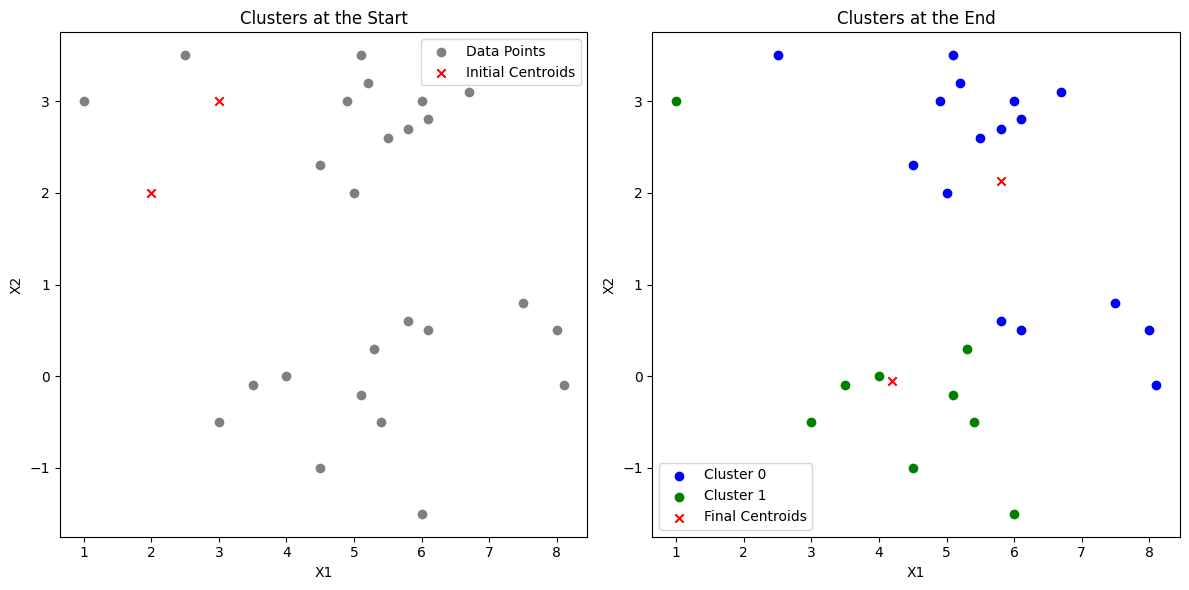

In [2]:
import matplotlib.pyplot as plt

# Initial centroids
initial_centroids = np.array([[3.0, 3.0], [2.0, 2.0]])

# Final centroids (Took directly from the output)
final_centroids = np.array([[5.8, 2.125], [4.2, -0.05555556]])

# Cluster assignments (Took directly from the output)
cluster_labels = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0])

cluster_0 = X[cluster_labels == 0]
cluster_1 = X[cluster_labels == 1]

plt.figure(figsize=(12, 6))

# Initial state Subplot
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c='gray', label='Data Points')
plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1], color='red', label='Initial Centroids', marker='x')
plt.title('Clusters at the Start')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()

# Final state Subplot
plt.subplot(1, 2, 2)
plt.scatter(cluster_0[:, 0], cluster_0[:, 1], color='blue', label='Cluster 0')
plt.scatter(cluster_1[:, 0], cluster_1[:, 1], color='green', label='Cluster 1')
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], color='red', label='Final Centroids', marker='x')
plt.title('Clusters at the End')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()

plt.tight_layout()
plt.show()

Iteration 1:
Centroids after iteration 1: [[4.32142857 0.77857143]
 [6.37272727 2.05454545]]
Iteration 2:
Centroids after iteration 2: [[4.21666667 0.49166667]
 [6.15384615 2.12307692]]
Iteration 3:
Centroids after iteration 3: [[4.03       0.3       ]
 [6.02       2.03333333]]
Iteration 4:
Centroids after iteration 4: [[4.03       0.3       ]
 [6.02       2.03333333]]
Convergence reached.


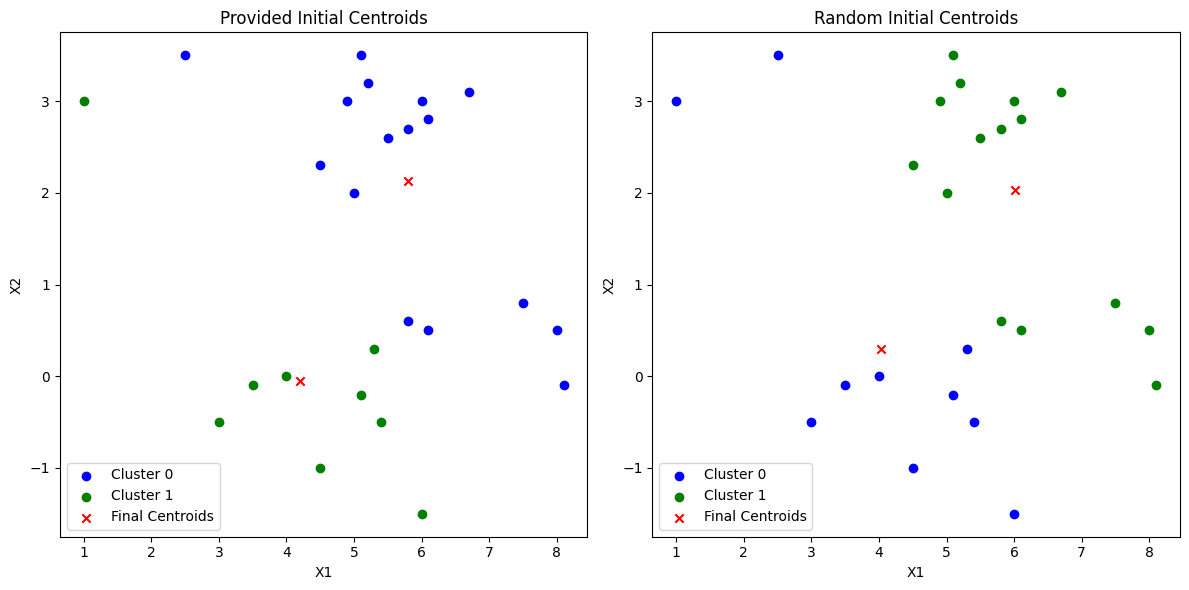

(array([[ 5.8       ,  2.125     ],
        [ 4.2       , -0.05555556]]),
 array([[4.03      , 0.3       ],
        [6.02      , 2.03333333]]))

In [3]:
import random

def random_initialize_centroids(X, k):
    return X[random.sample(range(len(X)), k)]

# Randomly initialize centroids
random_centroids = random_initialize_centroids(X, 2)

random_cluster_labels, random_final_centroids = kmeans(X, random_centroids)

# Separate points by their new clusters (random initialization)
random_cluster_0 = X[random_cluster_labels == 0]
random_cluster_1 = X[random_cluster_labels == 1]

plt.figure(figsize=(12, 6))

# Initial state Subplot
plt.subplot(1, 2, 1)
plt.scatter(cluster_0[:, 0], cluster_0[:, 1], color='blue', label='Cluster 0')
plt.scatter(cluster_1[:, 0], cluster_1[:, 1], color='green', label='Cluster 1')
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], color='red', label='Final Centroids', marker='x')
plt.title('Provided Initial Centroids')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()

# Random state Subplot
plt.subplot(1, 2, 2)
plt.scatter(random_cluster_0[:, 0], random_cluster_0[:, 1], color='blue', label='Cluster 0')
plt.scatter(random_cluster_1[:, 0], random_cluster_1[:, 1], color='green', label='Cluster 1')
plt.scatter(random_final_centroids[:, 0], random_final_centroids[:, 1], color='red', label='Final Centroids', marker='x')
plt.title('Random Initial Centroids')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()

plt.tight_layout()
plt.show()

final_centroids_provided = final_centroids
final_centroids_random = random_final_centroids

(final_centroids_provided, final_centroids_random)

Iteration 1:
Centroids after iteration 1: [[5.224 1.34 ]]
Iteration 2:
Centroids after iteration 2: [[5.224 1.34 ]]
Convergence reached.
Iteration 1:
Centroids after iteration 1: [[5.64090909 1.25      ]
 [2.16666667 2.        ]]
Iteration 2:
Centroids after iteration 2: [[5.74285714 1.31428571]
 [2.5        1.475     ]]
Iteration 3:
Centroids after iteration 3: [[5.83 1.38]
 [2.8  1.18]]
Iteration 4:
Centroids after iteration 4: [[5.83 1.38]
 [2.8  1.18]]
Convergence reached.
Iteration 1:
Centroids after iteration 1: [[ 5.64        0.18      ]
 [ 4.85833333  2.89166667]
 [ 5.3        -1.        ]]
Iteration 2:
Centroids after iteration 2: [[ 6.55714286  0.34285714]
 [ 4.85833333  2.89166667]
 [ 4.4        -0.6       ]]
Iteration 3:
Centroids after iteration 3: [[ 6.8         0.43333333]
 [ 4.85833333  2.89166667]
 [ 4.5        -0.54285714]]
Iteration 4:
Centroids after iteration 4: [[ 7.1         0.46      ]
 [ 4.85833333  2.89166667]
 [ 4.6        -0.4375    ]]
Iteration 5:
Centroids

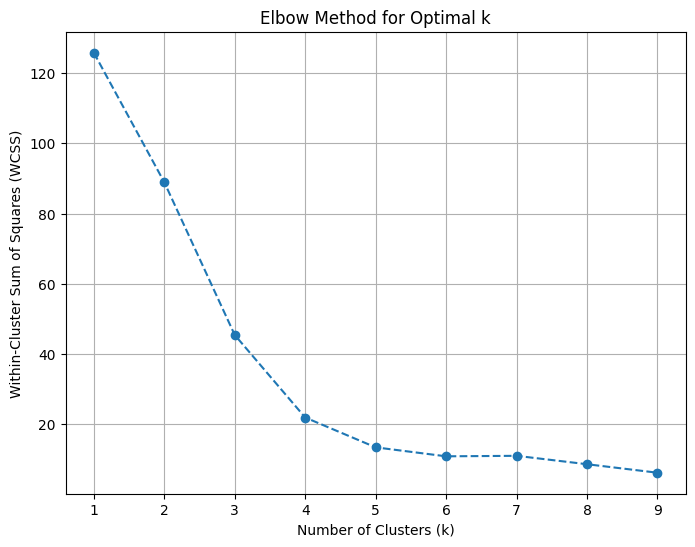

Iteration 1:
Centroids after iteration 1: [[6.7        1.07777778]
 [2.16666667 2.        ]
 [4.90769231 1.36923077]]
Iteration 2:
Centroids after iteration 2: [[6.7875     0.8375    ]
 [2.16666667 2.        ]
 [4.98571429 1.48571429]]
Iteration 3:
Centroids after iteration 3: [[6.7        0.425     ]
 [2.16666667 2.        ]
 [5.03571429 1.72142857]]
Iteration 4:
Centroids after iteration 4: [[ 6.18       -0.06      ]
 [ 2.16666667  2.        ]
 [ 5.19166667  2.34166667]]
Iteration 5:
Centroids after iteration 5: [[ 5.98181818 -0.05454545]
 [ 2.5         1.475     ]
 [ 5.48        2.82      ]]
Iteration 6:
Centroids after iteration 6: [[ 5.98181818 -0.05454545]
 [ 2.5         1.475     ]
 [ 5.48        2.82      ]]
Convergence reached.


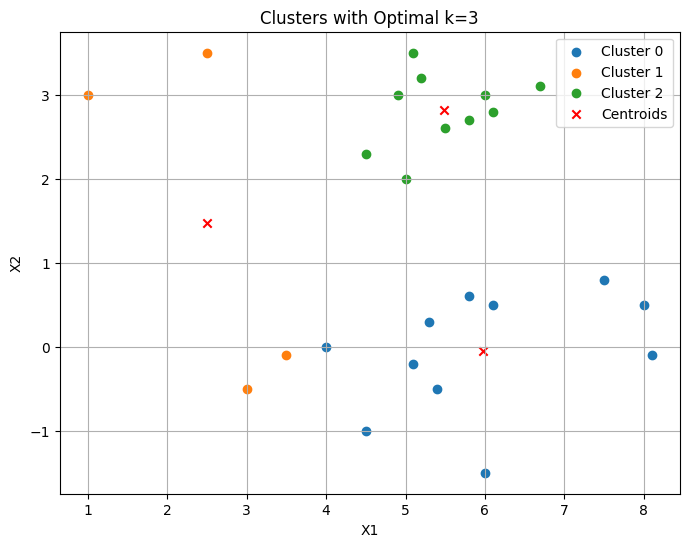

In [4]:
def calculate_wcss(X, cluster_labels, centroids):
    wcss = 0
    for i in range(len(centroids)):
        cluster_points = X[cluster_labels == i]
        wcss += np.sum((cluster_points - centroids[i]) ** 2)
    return wcss

wcss_values = []
k_values = range(1, 10)

for k in k_values:
    random_centroids = random_initialize_centroids(X, k)
    cluster_labels, final_centroids = kmeans(X, random_centroids)
    wcss = calculate_wcss(X, cluster_labels, final_centroids)
    wcss_values.append(wcss)

plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss_values, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Perform clustering with the optimal k (elbow point) and plot the resulting clusters
optimal_k = 3

# Run KMeans for the optimal k
optimal_centroids = random_initialize_centroids(X, optimal_k)
optimal_cluster_labels, optimal_final_centroids = kmeans(X, optimal_centroids)

# Separate points by their clusters
optimal_clusters = [X[optimal_cluster_labels == i] for i in range(optimal_k)]

# Plot the clusters
plt.figure(figsize=(8, 6))
for i, cluster in enumerate(optimal_clusters):
    plt.scatter(cluster[:, 0], cluster[:, 1], label=f'Cluster {i}')
plt.scatter(optimal_final_centroids[:, 0], optimal_final_centroids[:, 1], color='red', label='Centroids', marker='x')
plt.title(f'Clusters with Optimal k={optimal_k}')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.show()